In [31]:
# Центральный, Волго-Вятский, Центрально-Черноземный, Поволжский, Северо-Кавказский, Уральский,  Западно-Сибирский районы

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
dataframe = pd.read_excel('ЛР1 ПАД_cleansed.xlsx')
X = dataframe.drop(dataframe.columns[[0, 1]], axis=1)
print(X)
Y = dataframe['Y']
Y

      х1    х2   х3   х4    х5   х6   x7    x8    x9
0    9.2  15.9  7.8  5.3  16.7  169  148  22.7  2094
1    7.6  16.4  6.7  4.7  15.5  144  150  27.9  1768
2    7.3  18.3  6.3  4.9  19.6  138  133  33.7  1982
3    7.9  16.4  6.8  5.0  17.6  197  155  26.6  1621
4    7.9  17.0  6.3  4.4  20.1  182  159  30.5  1631
5    8.0  16.9  8.2  4.6  15.5  520  197  19.1  1066
6    7.2  17.6  8.1  5.2  16.1  143  165  31.2  1183
7    8.7  16.0  7.6  4.4  18.9  214  161  22.7  1308
8    7.8  17.9  7.2  4.3  15.7  158  163  24.4  1475
9    8.0  16.9  6.9  4.7  16.8  185  146  19.8  2081
10   7.5  19.4  6.7  4.6  19.3  153  165  28.6  2109
11   7.3  19.4  7.4  5.0  20.1  200  175  16.2  1757
12   7.6  17.3  7.1  5.3  12.0  180  154  21.3  2111
13   9.6  13.0  6.4  3.5  16.8  120  117  43.2  2112
14   9.0  14.1  7.0  3.3  15.2  132  126  34.7  1794
15  10.2  13.0  7.1  3.2  16.1  145  121  27.3  1688
16   8.1  16.3  6.2  3.9  17.1  137  121  32.0  1774
17   8.0  17.5  6.7  4.0  16.4  181  182  22.0

0     60.1
1     58.5
2     57.4
3     58.5
4     58.3
5     58.2
6     56.5
7     59.2
8     58.1
9     58.8
10    56.5
11    57.1
12    58.3
13    59.4
14    61.2
15    60.4
16    58.6
17    57.5
18    61.9
19    61.0
20    60.2
21    59.5
22    59.3
23    59.8
24    60.2
25    60.0
26    60.7
27    60.9
28    59.1
29    60.3
30    60.7
31    60.6
32    65.9
33    62.6
34    63.9
35    59.5
36    59.4
37    61.0
38    59.4
39    60.2
40    57.5
41    68.9
42    59.0
43    56.9
44    57.7
45    58.0
46    55.1
47    58.3
48    55.4
49    59.1
50    60.6
51    58.2
52    57.8
Name: Y, dtype: float64

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

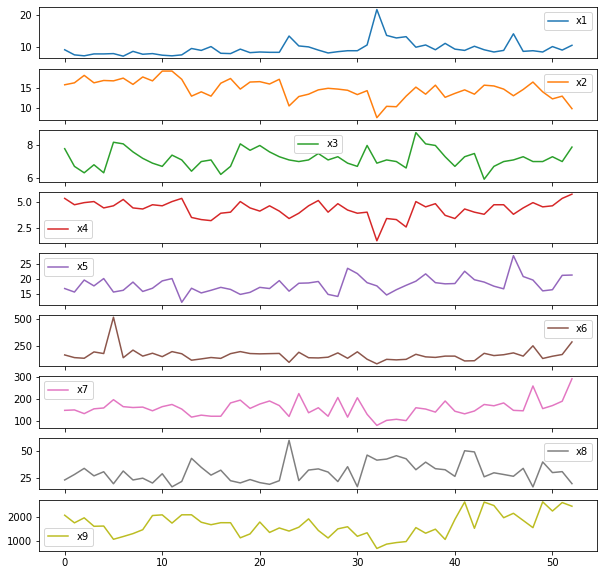

In [34]:
X.plot(subplots=True, figsize=(10, 10))

array([<AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>], dtype=object)

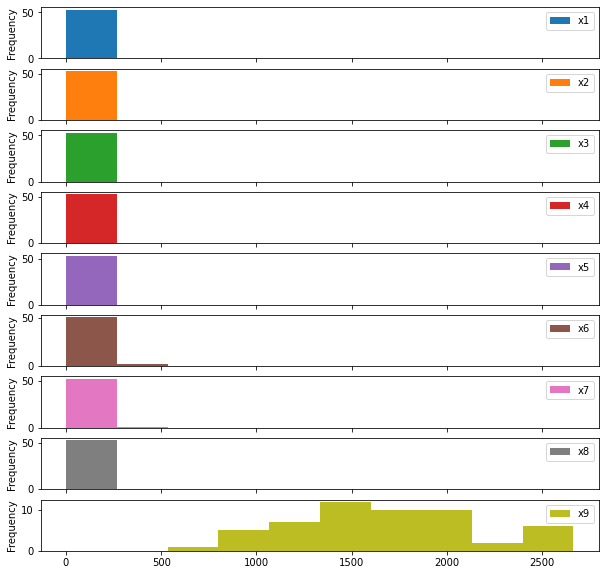

In [35]:
X.plot(kind='hist', subplots=True, figsize=(10, 10))

**Вариант Задания 1-3 с l2 нормализацией**

In [36]:
X_preproccessed = preprocessing.normalize(X, norm='l2')
X_preproccessed

array([[0.00436784, 0.00754876, 0.00370317, 0.00251625, 0.00792858,
        0.08023529, 0.07026522, 0.01077717, 0.99415793],
       [0.00426827, 0.00921047, 0.00376281, 0.00263959, 0.00870502,
        0.08087243, 0.08424212, 0.01566903, 0.99293376],
       [0.00366514, 0.00918795, 0.00316306, 0.00246016, 0.00984064,
        0.06928615, 0.06677578, 0.01691988, 0.99510974],
       [0.00481502, 0.00999574, 0.00414457, 0.00304748, 0.01072713,
        0.12007074, 0.0944719 , 0.0162126 , 0.98799322],
       [0.00478981, 0.01030718, 0.00381972, 0.00266774, 0.01218672,
        0.11034741, 0.0964024 , 0.01849229, 0.98888253],
       [0.00665142, 0.01405113, 0.00681771, 0.00382457, 0.01288713,
        0.43234247, 0.16379128, 0.01588027, 0.88630207],
       [0.00598165, 0.0146218 , 0.00672935, 0.00432008, 0.01337563,
        0.11880216, 0.13707942, 0.02592047, 0.98281788],
       [0.00651386, 0.01197952, 0.00569027, 0.00329437, 0.0141508 ,
        0.16022604, 0.12054389, 0.01699594, 0.97932554],


In [37]:
X_preproccessed_transposed = np.transpose(X_preproccessed)
# first = np.linalg.inv(np.dot(X_preproccessed_transposed, X_preproccessed))
w = np.dot(np.dot(np.linalg.inv(np.dot(X_preproccessed_transposed, X_preproccessed)), X_preproccessed_transposed), Y)
w

array([ -396.79623077,  -635.08705916,  2914.54387134, -1397.98170811,
         -33.59326478,    11.63614304,   -12.77074719,    18.50531291,
          58.92554073])

In [38]:
# Применим полученные веса к данным, получили "адекватные значения"
np.dot(X_preproccessed, w)

array([59.29877258, 58.10560833, 57.06352451, 57.90885297, 57.21289329,
       57.98672208, 59.48919293, 59.6577738 , 58.35108544, 58.41157492,
       57.33473184, 57.73286037, 58.26894971, 59.58923534, 60.44818936,
       60.91432335, 58.10551155, 57.90787969, 59.92926441, 59.79680046,
       60.12219045, 58.9989167 , 58.7564826 , 61.40460114, 59.01871638,
       59.40996881, 59.23768321, 60.30632323, 58.72312278, 59.44091598,
       58.32464661, 61.58351122, 65.26613712, 62.80166597, 62.71746591,
       60.53453438, 61.34675247, 61.3158275 , 60.23809652, 60.06872584,
       59.69685915, 59.62020403, 60.62482494, 57.88133467, 58.41301307,
       58.69734079, 59.14178827, 59.71085198, 56.60483876, 59.32923198,
       59.77150011, 58.85400937, 59.67341322])

In [39]:
pd.DataFrame(X_preproccessed).corr()

,0,1,2,3,4,5,6,7,8
0,1.000000,0.375874,0.817166,0.196516,0.837770,0.236992,0.324910,0.847179,-0.186310
1,0.375874,1.000000,0.771344,0.821775,0.622323,0.624656,0.683827,0.373646,-0.527357
2,0.817166,0.771344,1.000000,0.688514,0.871339,0.547859,0.659007,0.758990,-0.468042
3,0.196516,0.821775,0.688514,1.000000,0.473834,0.606950,0.758632,0.261655,-0.521534
4,0.837770,0.622323,0.871339,0.473834,1.000000,0.400576,0.554777,0.751085,-0.321689
5,0.236992,0.624656,0.547859,0.606950,0.400576,1.000000,0.718895,0.086547,-0.979074
6,0.324910,0.683827,0.659007,0.758632,0.554777,0.718895,1.000000,0.154917,-0.658564
7,0.847179,0.373646,0.758990,0.261655,0.751085,0.086547,0.154917,1.000000,-0.059089
8,-0.186310,-0.527357,-0.468042,-0.521534,-0.321689,-0.979074,-0.658564,-0.059089,1.000000


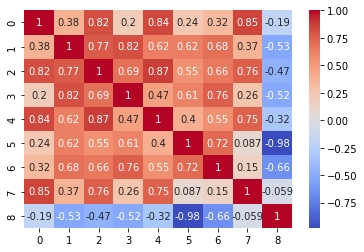

In [40]:
# Условность, как читать в верхнем теругольнике: строка * пересечение = столбец
df_plot = sns.heatmap(pd.DataFrame(X_preproccessed).corr(), cmap="coolwarm", annot=True)

**Задание 1 - 3, вариант с z-нормализацией. Приоритетный вариант**

In [41]:
# X_preproccessed_z = (np.array(X) - np.mean(np.array(X))) / np.std(np.array(X))
# X_preproccessed_z
X_preproccessed_z = X
for column in X.columns:
    X_preproccessed_z[column] = (X[column] - X[column].mean()) / X[column].std()
X_preproccessed_z

,х1,х2,х3,х4,х5,х6,x7,x8,x9
0,-0.150326,0.452477,1.049835,1.320080,-0.478741,0.000000,-0.272793,-0.762195,0.828080
1,-0.817743,0.658502,-0.862833,0.539810,-0.918105,-0.411745,-0.220314,-0.231872,0.165171
2,-0.942884,1.441396,-1.558349,0.799900,0.583056,-0.510564,-0.666387,0.359642,0.600332
3,-0.692603,0.658502,-0.688954,0.929945,-0.149218,0.461154,-0.089116,-0.364453,-0.133748
4,-0.692603,0.905732,-1.558349,0.149674,0.766124,0.214107,0.015843,0.033290,-0.113414
5,-0.650889,0.864527,1.745351,0.409765,-0.918105,5.780900,1.012948,-1.129342,-1.262321
6,-0.984598,1.152962,1.571472,1.190035,-0.698423,-0.428215,0.173280,0.104679,-1.024406
7,-0.358894,0.493682,0.702077,0.149674,0.326760,0.741141,0.068322,-0.762195,-0.770223
8,-0.734316,1.276577,0.006561,0.019629,-0.844878,-0.181168,0.120801,-0.588821,-0.430634
9,-0.650889,0.864527,-0.515075,0.539810,-0.442128,0.263517,-0.325272,-1.057953,0.801645


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

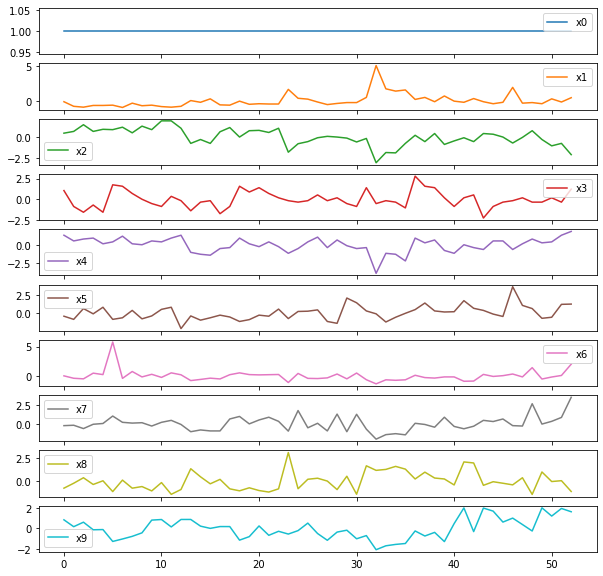

In [42]:
X_preproccessed_z.insert(0, 'x0', 1)
pd.DataFrame(X_preproccessed_z).plot(subplots=True, figsize=(10, 10))

array([<AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>],
      dtype=object)

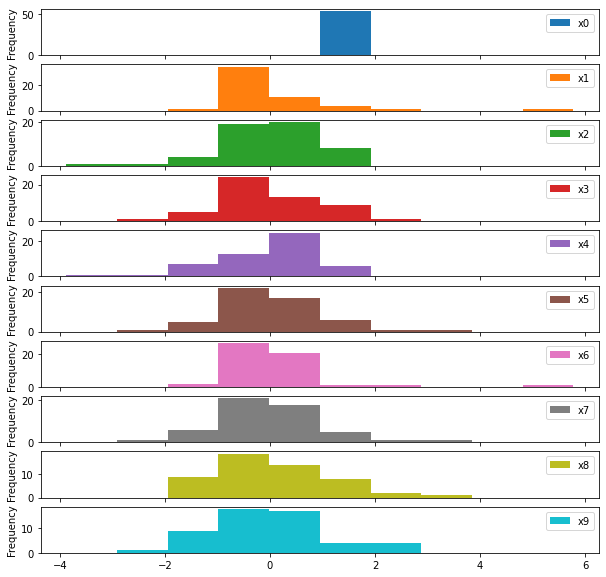

In [43]:
X_preproccessed_z.plot(kind='hist', subplots=True, figsize=(10, 10))

In [44]:
X_preproccessed_transposed_z = np.transpose(X_preproccessed_z)
# first = np.linalg.inv(np.dot(X_preproccessed_transposed, X_preproccessed))
w = np.dot(np.dot(np.linalg.inv(np.dot(X_preproccessed_transposed_z, X_preproccessed_z)), X_preproccessed_transposed_z),
           Y)
w

array([ 5.94566038e+01, -7.06613289e-01, -1.22815456e+00,  7.99704137e-01,
       -5.76838142e-01, -1.33507944e-01, -3.19175780e-01, -6.18303598e-01,
        2.84324091e-03, -6.75282336e-02])

In [45]:
Y_pred_by_x_z = np.dot(X_preproccessed_z,
                       w)  # Перемножим полученные веса на z-нормализаванные данные, получим предсказанные значения
Y_pred_by_x_z

array([59.25969812, 58.60269697, 57.1025995 , 57.98570517, 57.32840736,
       57.74732777, 59.49882857, 59.30642288, 58.52490864, 58.25036194,
       56.66595959, 56.9945383 , 58.12129435, 60.77202861, 61.28686998,
       61.6850971 , 58.84023514, 57.69317249, 59.70372456, 59.66584089,
       59.73607622, 58.98045109, 58.50406573, 62.14175659, 58.96358251,
       60.00711925, 59.60754831, 60.79372752, 58.82753872, 60.03027643,
       58.91304291, 61.34432554, 63.25819794, 62.41326319, 62.48467611,
       60.96030017, 60.67011199, 60.91275116, 60.20149623, 60.2214797 ,
       60.27498225, 60.22728811, 60.97855479, 57.09307732, 58.13521757,
       58.6719496 , 58.69715801, 59.91789035, 55.84685347, 59.87397818,
       60.31976429, 58.64993196, 58.50584892])

In [46]:
pd.DataFrame(X_preproccessed_z).corr()

,x0,х1,х2,х3,х4,х5,х6,x7,x8,x9
x0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
х1,NaN,1.000000,-0.817577,-0.005690,-0.708038,0.130395,-0.289246,-0.370477,0.470179,-0.364186
х2,NaN,-0.817577,1.000000,0.002485,0.538133,-0.084546,0.261406,0.197748,-0.503458,0.186819
х3,NaN,-0.005690,0.002485,1.000000,0.359488,-0.032915,0.292268,0.235653,-0.085376,-0.282762
х4,NaN,-0.708038,0.538133,0.359488,1.000000,0.036773,0.373047,0.581485,-0.450832,0.406535
х5,NaN,0.130395,-0.084546,-0.032915,0.036773,1.000000,-0.004476,0.123572,0.058539,0.248865
х6,NaN,-0.289246,0.261406,0.292268,0.373047,-0.004476,1.000000,0.611724,-0.598388,-0.022989
x7,NaN,-0.370477,0.197748,0.235653,0.581485,0.123572,0.611724,1.000000,-0.659593,0.226936
x8,NaN,0.470179,-0.503458,-0.085376,-0.450832,0.058539,-0.598388,-0.659593,1.000000,-0.100035
x9,NaN,-0.364186,0.186819,-0.282762,0.406535,0.248865,-0.022989,0.226936,-0.100035,1.000000


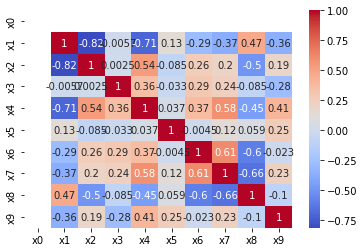

In [47]:
df_plot = sns.heatmap(pd.DataFrame(X_preproccessed_z).corr(), cmap="coolwarm", annot=True)

In [48]:
# применим p=2 - l2 нормализация данных X. Numpy по умолчанию применяет нормализацию при вычислении числа обусловленности. Т.к. нельзя отменить нормализацию, применим l2. Аналогичный метод библиотеки scipy применяет нормализацию Фробениуса (????), поэтому от его не применяем.
np.linalg.cond(X, p=2)
# Число обусловленности = 5599, что свидетельствует о сильной мультиколлинеарности в данных (слабая мультиколлинеарность при [1..10]).

5.8336907578659085

**Задание 4 - анализ регрессионных остатков**

In [49]:
print(Y - Y_pred_by_x_z)
mse = mean_squared_error(Y, Y_pred_by_x_z)
print('Среднеквадратическая ошибка:', mse)
print('RMSE (root mean square error):', mse ** 0.5)
print('R2:', r2_score(y_true=Y, y_pred=Y_pred_by_x_z))  # R2 метрика для модели, полученной аналитически, 9 задание

0     0.840302
1    -0.102697
2     0.297401
3     0.514295
4     0.971593
5     0.452672
6    -2.998829
7    -0.106423
8    -0.424909
9     0.549638
10   -0.165960
11    0.105462
12    0.178706
13   -1.372029
14   -0.086870
15   -1.285097
16   -0.240235
17   -0.193172
18    2.196275
19    1.334159
20    0.463924
21    0.519549
22    0.795934
23   -2.341757
24    1.236417
25   -0.007119
26    1.092452
27    0.106272
28    0.272461
29    0.269724
30    1.786957
31   -0.744326
32    2.641802
33    0.186737
34    1.415324
35   -1.460300
36   -1.270112
37    0.087249
38   -0.801496
39   -0.021480
40   -2.774982
41    8.672712
42   -1.978555
43   -0.193077
44   -0.435218
45   -0.671950
46   -3.597158
47   -1.617890
48   -0.446853
49   -0.773978
50    0.280236
51   -0.449932
52   -0.705849
Name: Y, dtype: float64
Среднеквадратическая ошибка: 2.8925291537944653
RMSE (root mean square error): 1.700743706086977
R2: 0.45903545261892087


In [50]:
w = np.array([1] * len(X.columns))
n = len(X)
learning_rate = 0.1
for iteration in range(1, 300):
    # шаг 2 - считаем y^
    y_iter_pred = np.dot(np.array(X_preproccessed_z), w)
    # шаг 3 - рассчет MSE и grad
    mse = mean_squared_error(Y, pd.DataFrame(y_iter_pred))
    dS_dw = (-2 / n) * (np.dot((np.array(Y) - np.array(y_iter_pred)), np.array(X_preproccessed_z)))

    # шаг 4 - новые веса
    w = w - learning_rate * dS_dw

    # grad = np.gradient()
    print(iteration, mse)
Y_pred_by_x_z_by_grad = np.dot(X_preproccessed_z, w)
print(w)

1 3435.8683980126452
2 2194.409513546002
3 1405.2737806689863
4 900.6971944356409
5 577.8158262270691
6 371.1733138632996
7 238.91395353955588
8 154.25620532498317
9 100.06208449084777
10 65.36436159681234
11 43.14455849607384
12 28.911114323735127
13 19.789543130459645
14 13.940206741330819
15 10.18572877656461
16 7.772560981071992
17 6.218397071511406
18 5.214523524544697
19 4.5633270292399075
20 4.138300604086623
21 3.8584480167621726
22 3.6719026887436716
23 3.545443664605128
24 3.45778561557617
25 3.3952841990616833
26 3.349187250156402
27 3.313875323419245
28 3.28573544157913
29 3.2624401201007194
30 3.242485790358888
31 3.224897257795057
32 3.209038439940555
33 3.1944911387238446
34 3.1809773677893074
35 3.1683095662442526
36 3.15635866934046
37 3.145033615842364
38 3.134268181953435
39 3.124012510323036
40 3.114227649141667
41 3.1048820222096274
42 3.09594913873261
43 3.08740609992369
44 3.079232618496191
45 3.071410368959845
46 3.0639225518570345
47 3.056753596866063
48 3.0498

<AxesSubplot:>

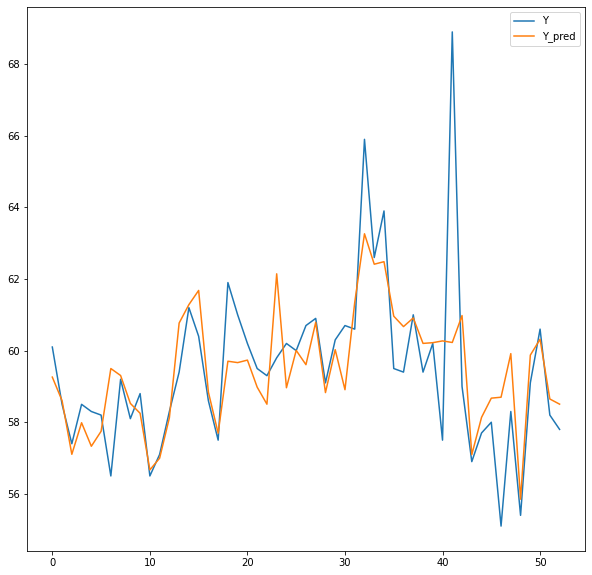

In [51]:
pd.DataFrame({"Y":Y, "Y_pred":Y_pred_by_x_z_by_grad}).plot(figsize=(10,10))
# Y.plot(subplots=True, figsize=(10, 10))

# Задание 6

In [52]:
print('Итоговое MSE по градлиентному методу:', mse)
print('Итоговое RMSE по градиентному методу:', mse ** 0.5)
print('R2:',
      r2_score(y_true=Y, y_pred=Y_pred_by_x_z_by_grad))  # R2 метрика для модели, полученной аналитически, 9 задание
# Данные MSE/RMSE для аналитического веса (посчитаны выше)
# Среднеквадратическая ошибка: 2.892529153794463
# RMSE (root mean square error): 1.7007437060869763

Итоговое MSE по градлиентному методу: 2.8925328438878584
Итоговое RMSE по градиентному методу: 1.7007447909336246
R2: 0.4590347911843341


In [53]:
reg = LinearRegression().fit(X, Y)
print("Веса модели из sklearn: ", reg.coef_)
# Предскажем Y на исходных данных (на тех же, на которых обучались)
Y_pred_sklearn = reg.predict(X)
mse = mean_squared_error(Y, Y_pred_sklearn)
print("MSE модели из sklearn:", mse)
print("RMSE модели из sklearn", mse ** 0.5)
print("R2 модели из sklearn", reg.score(X, Y))  # для задания 8

Веса модели из sklearn:  [ 0.         -0.70661329 -1.22815456  0.79970414 -0.57683814 -0.13350794
 -0.31917578 -0.6183036   0.00284324 -0.06752823]
MSE модели из sklearn: 2.892529153794465
RMSE модели из sklearn 1.7007437060869768
R2 модели из sklearn 0.459035452618921


In [54]:
import statsmodels.api as sm

results = sm.OLS(Y, X).fit()
print(results.summary())  # РАСШИФРОВАТЬ КАЖДУЮ БУКВУ

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     4.054
Date:                Sun, 01 Oct 2023   Prob (F-statistic):           0.000812
Time:                        22:41:40   Log-Likelihood:                -103.35
No. Observations:                  53   AIC:                             226.7
Df Residuals:                      43   BIC:                             246.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x0            59.4566      0.259    229.243      0.0